
--- Summary Statistics ---
Number of rows (instances): 334
Number of columns (features): 18
Number of numerical features: 12
Number of categorical features: 6
Numerical features: ['Status', 'Age', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin', 'Stage']
Categorical features: ['Drug', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema']

--- Correlation with 'Status' ---
Top 3 features most correlated with 'Status':
Bilirubin: 0.4329
Prothrombin: 0.3765
Stage: 0.3338

--- Plotting Histograms ---


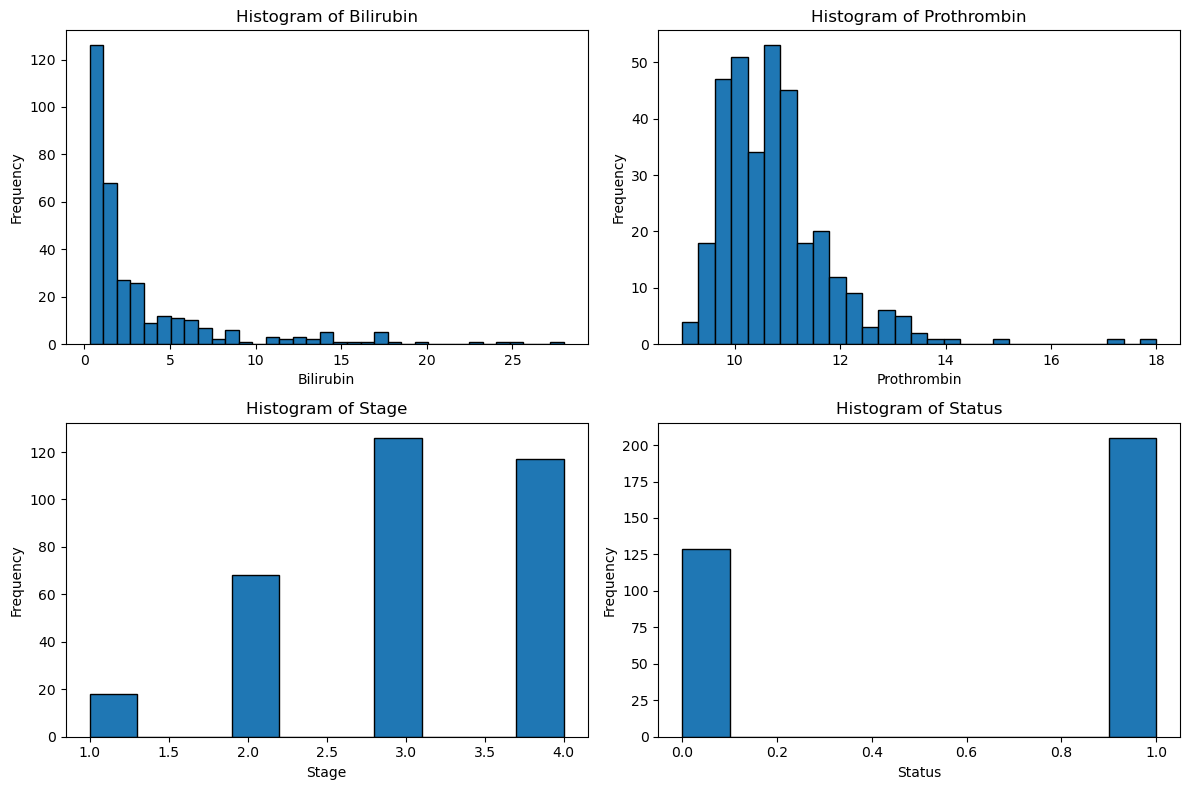


--- Missing Values ---
Drug: 80 missing values (23.95%)
Ascites: 80 missing values (23.95%)
Hepatomegaly: 80 missing values (23.95%)
Spiders: 80 missing values (23.95%)
Cholesterol: 102 missing values (30.54%)
Copper: 82 missing values (24.55%)
Alk_Phos: 80 missing values (23.95%)
SGOT: 80 missing values (23.95%)
Tryglicerides: 102 missing values (30.54%)
Platelets: 9 missing values (2.69%)
Prothrombin: 2 missing values (0.60%)
Stage: 5 missing values (1.50%)
Total missing values: 782


In [2]:
# EDA.py

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# Load the training dataset
df = pd.read_csv("Training.csv")  

# 1. Summary Statistics

print("\n--- Summary Statistics ---")
n_rows, n_cols = df.shape
print(f"Number of rows (instances): {n_rows}")
print(f"Number of columns (features): {n_cols}")

numerical_features = df.select_dtypes(include=[np.number]).columns.tolist()
categorical_features = df.select_dtypes(exclude=[np.number]).columns.tolist()

print(f"Number of numerical features: {len(numerical_features)}")
print(f"Number of categorical features: {len(categorical_features)}")
print(f"Numerical features: {numerical_features}")
print(f"Categorical features: {categorical_features}")


# 2. Correlation with Target ('Status')

print("\n--- Correlation with 'Status' ---")
target_col = 'Status'
if target_col not in df.columns:
    raise ValueError(f" Target column '{target_col}' not found!")

# Compute Pearson correlation for numerical features
correlations = {}
for col in numerical_features:
    if col != target_col:
        # Drop NaNs for correlation computation
        valid_rows = df[[col, target_col]].dropna()
        if not valid_rows.empty:
            corr, _ = pearsonr(valid_rows[col], valid_rows[target_col])
            correlations[col] = abs(corr)

# Top 3 features by absolute correlation
top3_features = sorted(correlations, key=correlations.get, reverse=True)[:3]
print("Top 3 features most correlated with 'Status':")
for feature in top3_features:
    print(f"{feature}: {correlations[feature]:.4f}")

# -------------------------------
# 3. Histograms
# -------------------------------
print("\n--- Plotting Histograms ---")
features_to_plot = top3_features + [target_col]
plt.figure(figsize=(12, 8))

for i, feature in enumerate(features_to_plot):
    plt.subplot(2, 2, i + 1)
    plt.hist(df[feature].dropna(), bins='auto', edgecolor='black')
    plt.title(f"Histogram of {feature}")
    plt.xlabel(feature)
    plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

# -------------------------------
# 4. Missing Values
# -------------------------------
print("\n--- Missing Values ---")
missing_counts = df.isnull().sum()
missing_counts = missing_counts[missing_counts > 0]
total_missing = 0

if missing_counts.empty:
    print("No missing values found!")
else:
    for col, count in missing_counts.items():
        percent = 100 * count / len(df)
        print(f"{col}: {count} missing values ({percent:.2f}%)")
        total_missing += count
print(f"Total missing values: {total_missing}")